In [1]:
# Explore the Mexico SMN WRF Forecast data

In [2]:
%matplotlib inline
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset('/mnt/DataDrive2/data/mjolly/SMN/wrfout_cgsmn_2022020100.nc')

In [4]:
# Correcting the dates in this dataset
#t = ds.Times[0].values.item(0).decode('utf-8')
#dat = pd.to_datetime(t, format='%Y-%m-%d_%H:%M:%S')
#df.Times[0]  b'2022-02-01_00:00:00'  Note: the b'' needs to be decoded into a string then converted to a date

<AxesSubplot:>

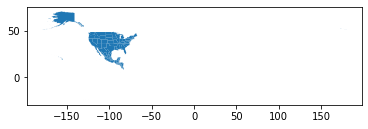

In [5]:
# Load the country boundaries file
shp_path = r"/home/mjolly/scripts/data"
countries_path = os.path.join(shp_path, "ne_10m_admin_0_countries_lakes.shp")
countries_gdf = gpd.read_file(countries_path)
states_path = os.path.join(shp_path, "ne_10m_admin_1_states_provinces_lakes.shp")
states_gdf = gpd.read_file(states_path)

MXBnd = states_gdf[states_gdf['iso_a2'].isin(['US','MX','HN','NI','SV','BZ','GT','CR','PN'])]
MXBnd.plot()

In [6]:
# Pulll out the Times array
df=ds.Times.to_dataframe()

In [7]:
# This was a handy find. Basically create a new column in a table by ampping a function to the data frame column
# https://stackoverflow.com/questions/64013596/is-there-a-better-way-to-iterate-over-every-row-of-a-dataframe
def func(X):
    #V = pd.to_datetime(ds.Times[0].values.item(0).decode('utf-8'), format='%Y-%m-%d_%H:%M:%S')
    V = pd.to_datetime(X.decode('utf-8'), format='%Y-%m-%d_%H:%M:%S')
    print(V)
    return V
r=map(func, df.Times)
df['NewTime']=pd.DataFrame(r)


2022-02-01 00:00:00
2022-02-01 01:00:00
2022-02-01 02:00:00
2022-02-01 03:00:00
2022-02-01 04:00:00
2022-02-01 05:00:00
2022-02-01 06:00:00
2022-02-01 07:00:00
2022-02-01 08:00:00
2022-02-01 09:00:00
2022-02-01 10:00:00
2022-02-01 11:00:00
2022-02-01 12:00:00
2022-02-01 13:00:00
2022-02-01 14:00:00
2022-02-01 15:00:00
2022-02-01 16:00:00
2022-02-01 17:00:00
2022-02-01 18:00:00
2022-02-01 19:00:00
2022-02-01 20:00:00
2022-02-01 21:00:00
2022-02-01 22:00:00
2022-02-01 23:00:00
2022-02-02 00:00:00
2022-02-02 01:00:00
2022-02-02 02:00:00
2022-02-02 03:00:00
2022-02-02 04:00:00
2022-02-02 05:00:00
2022-02-02 06:00:00
2022-02-02 07:00:00
2022-02-02 08:00:00
2022-02-02 09:00:00
2022-02-02 10:00:00
2022-02-02 11:00:00
2022-02-02 12:00:00
2022-02-02 13:00:00
2022-02-02 14:00:00
2022-02-02 15:00:00
2022-02-02 16:00:00
2022-02-02 17:00:00
2022-02-02 18:00:00
2022-02-02 19:00:00
2022-02-02 20:00:00
2022-02-02 21:00:00
2022-02-02 22:00:00
2022-02-02 23:00:00
2022-02-03 00:00:00
2022-02-03 01:00:00


In [8]:
# Assign the correct time to the SMN WRF Dataset
ds['Time']= df['NewTime']

In [9]:
ds['south_north'] = ds['XLAT'][0,:,0].values
ds['west_east'] = ds['XLONG'][0,0,:].values

<AxesSubplot:title={'center':'Time = 2022-02-01'}, xlabel='west_east', ylabel='south_north'>

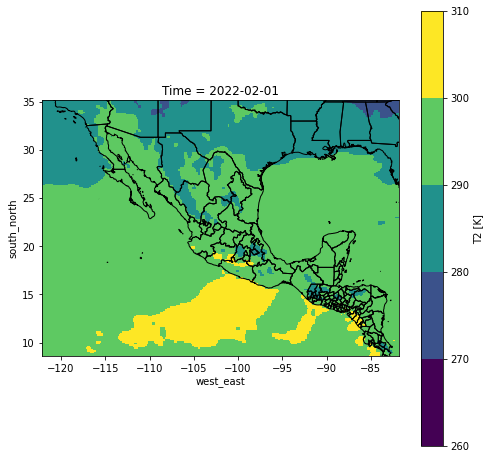

In [10]:
f,ax = plt.subplots(figsize=(8,8))
ds.T2[0].plot(ax=ax,levels=[260,270,280,290,300,310])
MXBnd.plot(ax=ax,edgecolor='black',facecolor='none')

In [11]:
# Summarize to maximum daily data
dstmax = ds.resample(Time="D").max('Time')

<AxesSubplot:title={'center':'Maximum Temperature (degK) (01-Feb-2022)'}, xlabel='west_east', ylabel='south_north'>

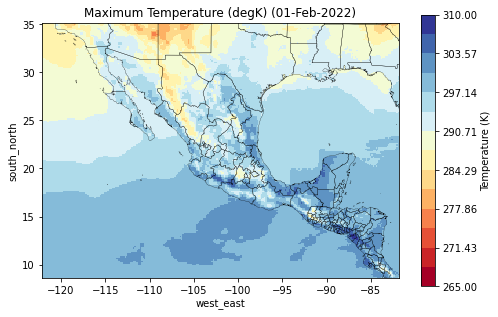

In [25]:
f,ax = plt.subplots(figsize=(8,5))
levs = np.linspace(265,310,15)
dstmax.T2[0].plot(ax=ax,levels=levs,colors='RdYlBu',cbar_kwargs={'label': "Temperature (K)"})
ax.set_title("Maximum Temperature (degK) (01-Feb-2022)")
MXBnd.plot(ax=ax,edgecolor='black',facecolor='none',linewidth=0.25)
fout = f'/home/mjolly/Work/Mexico/sar-erc-perc-fcst-{MyDate}.png'
plt.savefig(fout, dpi=300, bbox_inches='tight',facecolor='white', transparent=False)